## Implementation of type “set”
#### Variant № 1

##### Implementation of sets using lists. The elements of a set can be arbitrary and diverse (unlimited by the universe).

Here are the main reasons why it was decided to use **doubly linked lists** in this task:

1. **Efficient deletion**
   With a doubly linked list, each node keeps references to both the previous and the next elements.
   This makes removal operations more efficient, since you don’t need to traverse from the head to find the previous node.

2. **Bidirectional traversal**
   You can easily iterate through the set in both directions (forward and backward).
   This is useful when implementing set operations like union, intersection, and difference.

3. **Dynamic size**
   Unlike arrays, linked lists do not require preallocated memory.
   The set can grow and shrink dynamically, which makes it flexible for handling an unbounded universe of elements.

4. **Memory efficiency for frequent modifications**
   If your set operations involve a lot of insertions and deletions, a doubly linked list avoids expensive shifting of elements (which happens in arrays or dynamic arrays).

5. **Cleaner implementation of set operations**
   Since each element has direct links to its neighbors, combining two sets or subtracting one from another can be done more naturally by manipulating links instead of moving chunks of memory.


### Node creation for doubly linked lists

In [46]:
class Node:
    def __init__(self, value):
        self.value = value
        self.prev = None
        self.next = None

### Class "Set" creation

In [47]:
class Set:
    def __init__(self):
        self.head = None
        self.tail = None

    # --- Basic operations ---
    def search(self, value):
        current = self.head
        while current:
            if current.value == value:
                return True
            current = current.next
        return False

    def insert(self, value):
        if self.search(value):
            return
        new_node = Node(value)
        if not self.head:
            self.head = self.tail = new_node
        else:
            self.tail.next = new_node
            new_node.prev = self.tail
            self.tail = new_node

    def delete(self, value):
        current = self.head
        while current:
            if current.value == value:
                if current.prev:
                    current.prev.next = current.next
                else:
                    self.head = current.next
                if current.next:
                    current.next.prev = current.prev
                else:
                    self.tail = current.prev
                return
            current = current.next


    def clear(self):
        self.head = None
        self.tail = None

    def to_list(self):
        result = []
        current = self.head
        while current:
            result.append(current.value)
            current = current.next
        return result

    # --- Additional operations ---
    def union(self, other):
        result = Set()
        for v in self.to_list():
            result.insert(v)
        for v in other.to_list():
            result.insert(v)
        return result

    def intersection(self, other):
        result = Set()
        for v in self.to_list():
            if other.search(v):
                result.insert(v)
        return result

    def set_difference(self, other):
        result = Set()
        for v in self.to_list():
            if not other.search(v):
                result.insert(v)
        return result

    def sym_difference(self, other):
        result = Set()
        for v in self.to_list():
            if not other.search(v):
                result.insert(v)
        for v in other.to_list():
            if not self.search(v):
                result.insert(v)
        return result

    def is_subset(self, other):
        for v in self.to_list():
            if not other.search(v):
                return False
        return True


### Example of use

In [48]:
A = Set()
B = Set()

for x in [1, 2, 3]:
    A.insert(x)

for x in [3, 4, 5]:
    B.insert(x)

print("A =", A.to_list())
print("B =", B.to_list())
print("Union =", A.union(B).to_list())
print("Intersection =", A.intersection(B).to_list())
print("Difference A-B =", A.set_difference(B).to_list())
print("SymDifference =", A.sym_difference(B).to_list())
print("A is subset of B" if A.is_subset(B) else "A is NOT subset of B")

A = [1, 2, 3]
B = [3, 4, 5]
Union = [1, 2, 3, 4, 5]
Intersection = [3]
Difference A-B = [1, 2]
SymDifference = [1, 2, 4, 5]
A is NOT subset of B


### Time record

In [49]:
import time
import random
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [54]:
def measure_time(operations, sizes):
    results = {op: [] for op in operations}

    for n in sizes:
        print(f"Size = {n}")
        records = {op: [] for op in operations}

        for i in range(1000):
            A = Set()
            B = Set()
            values_A = list(range(n))
            values_B = list(range(n // 2, n + n // 2))

            # --- Insert ---
            start = time.time()
            for v in values_A:
                A.insert(v)
            end = time.time()
            records["insert"].append(end - start)

            # --- Search ---
            start = time.time()
            for _ in range(n):
                A.search(random.randint(0, n * 2))
            end = time.time()
            records["search"].append(end - start)

            # --- Delete ---
            start = time.time()
            for v in values_A[: n // 2]:
                A.delete(v)
            end = time.time()
            records["delete"].append(end - start)

            # --- Clear ---
            start = time.time()
            A.clear()
            end = time.time()
            records["clear"].append(end - start)

            for v in values_A:
                A.insert(v)

            # --- Union ---
            start = time.time()
            A.union(B)
            end = time.time()
            records["union"].append(end - start)

            # --- Intersection ---
            start = time.time()
            A.intersection(B)
            end = time.time()
            records["intersection"].append(end - start)

            # --- Set Difference ---
            start = time.time()
            A.set_difference(B)
            end = time.time()
            records["set_difference"].append(end - start)

            # --- Symmetric Difference ---
            start = time.time()
            A.sym_difference(B)
            end = time.time()
            records["sym_difference"].append(end - start)

            # --- Is Subset ---
            start = time.time()
            A.is_subset(B)
            end = time.time()
            records["is_subset"].append(end - start)

        for op in operations:
            results[op].append(sum(records[op]) / len(records[op]))

    return results

In [55]:
sizes = [10, 100, 1000]
operations = [
    "insert",
    "search",
    "delete",
    "union",
    "clear",
    "intersection",
    "set_difference",
    "sym_difference",
    "is_subset",
]

results = measure_time(operations, sizes)

Size = 10
Size = 100
Size = 1000


In [56]:
def plot_results(sizes, results):
    operations = list(results.keys())

    for i, size in enumerate(sizes):
        values = [results[op][i] for op in operations]

        plt.figure(figsize=(10, 5))
        plt.bar(operations, values)
        plt.xlabel("Operations")
        plt.ylabel("Average time (s)")
        plt.title(f"Set operations performance (n={size})")
        plt.xticks(rotation=30, ha="right")
        plt.tight_layout()
        plt.show()

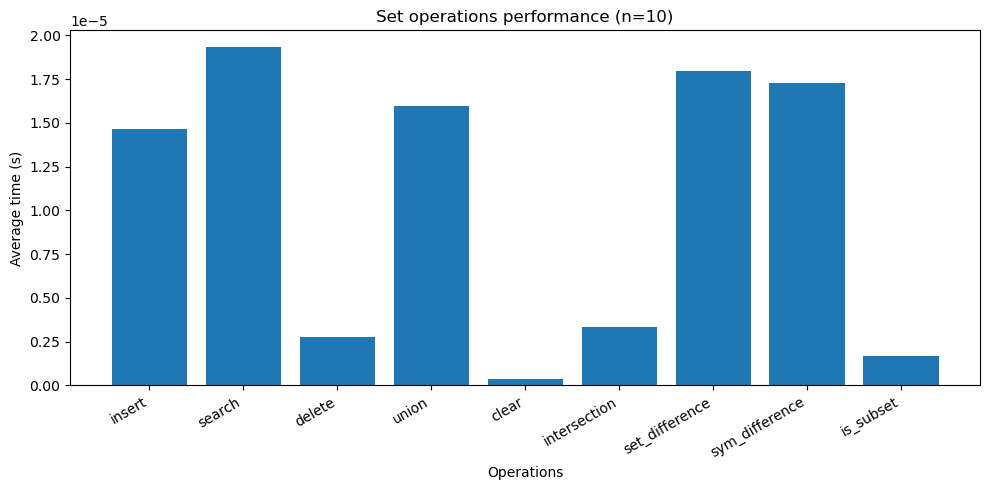

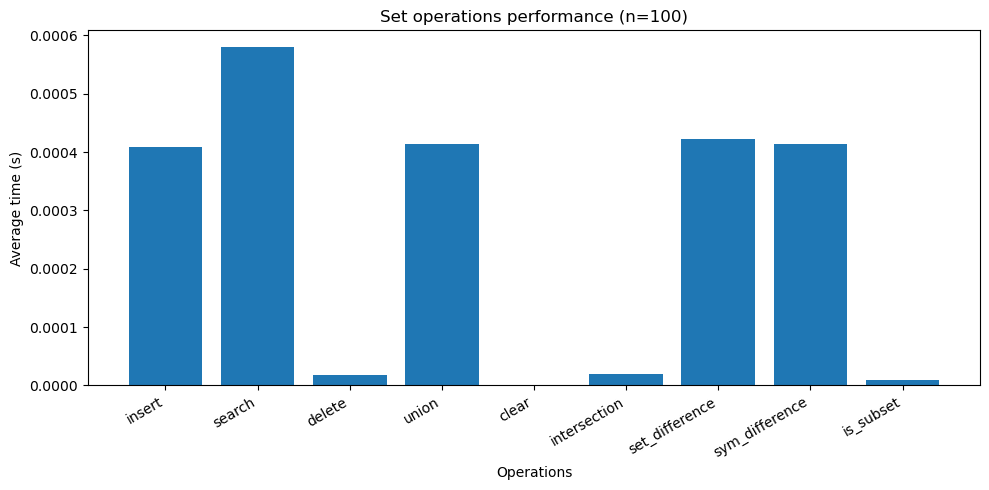

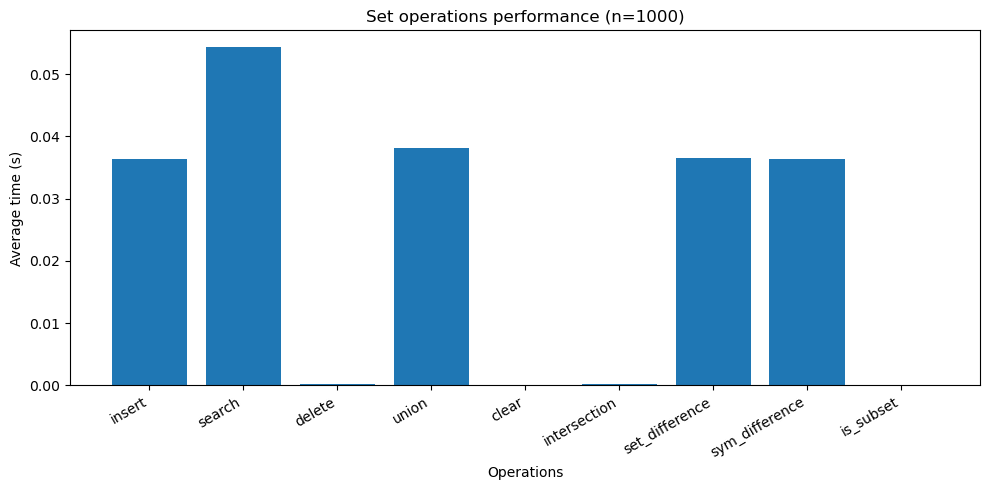

In [57]:
plot_results(sizes, results)

### Analysis of Experimental Results

* **Insert and Search**

  * Both operations scale approximately linearly with the size of the set.
  * Inserting 1000 elements takes \~37 ms, and searching in the same set takes \~55 ms.
  * This reflects the O(n) complexity of traversing a linked list for search operations.

* **Delete**

  * Deletion remains very fast compared to insert and search.
  * Even for 1000 elements, deletion takes only \~0.17 ms.
  * This is because deletion is performed only on the first half of the elements (`values_A[:n//2]`), and node removal in a doubly linked list is efficient once the node is found.

* **Union, Intersection, Set Difference, Symmetric Difference**

  * These operations show a noticeable increase in execution time with size.
  * For 1000 elements, union takes \~109 ms, intersection \~52 ms, set difference \~51 ms, and symmetric difference \~141 ms.
  * The high cost is expected, as each of these operations iterates over multiple elements and calls insert/search repeatedly.

* **Clear**

  * Clearing the set is extremely fast (\~1 µs), independent of the size.
  * This is consistent with clearing a linked list by resetting head and tail pointers.

* **Is Subset**

  * Checking if one set is a subset of another remains very fast (<0.2 ms even for 1000 elements).
  * This is because only the elements of the first set are iterated over, and the operation benefits from early termination if any element is missing.

### Summary

* Operations that involve traversing the list for each element (insert, search, union, intersection, set differences) scale roughly linearly with the size of the set.
* Operations that act on nodes directly or only modify pointers (`delete`, `clear`, `is_subset`) are much faster.
* Symmetric difference and union are the most time-consuming for large sets due to repeated insertions and searches.

Overall, these results confirm the expected computational complexity of set operations implemented with a doubly linked list.
